<a href="https://colab.research.google.com/github/Saikumar1422/excelr-data-science-assignments/blob/main/clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Problem Statement

Perform Clustering(Hierarchical, Kmeans) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


performing different type of clkusters on the airlines dataset to obtain optimum number of clusters

# **DATASET INFORMATION**

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
# Draw the inferences from the clusters obtained.

# Data Description:

# The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

#**COLUMNS:**

# ID --Unique ID

# Balance--Number of miles eligible for award travel

# Qual_mile--Number of miles counted as qualifying for Topflight status

# cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
# cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
# cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

# 1 = under 5,000
# 2 = 5,000 - 10,000
# 3 = 10,001 - 25,000
# 4 = 25,001 - 50,000
# 5 = over 50,000

# Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

# Bonus_trans--Number of non-flight bonus transactions in the past 12 months

# Flight_miles_12mo--Number of flight miles in the past 12 months

# Flight_trans_12--Number of flight transactions in the past 12 months

# Days_since_enrolled--Number of days since enrolled in flier program

# Award--whether that person had award flight (free flight) or not


# **importing libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


## **DATA COLLECTION**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EastWestAirlines.csv")

In [ ]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.shape

(3999, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
cols=df.columns

In [ ]:
df.describe

<bound method NDFrame.describe of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1           

df.isnull.sum()

In [ ]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
df2=std.fit_transform(df)
df2

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
df_norm=pd.DataFrame(df2,columns=cols)
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **KMeans Clustering**

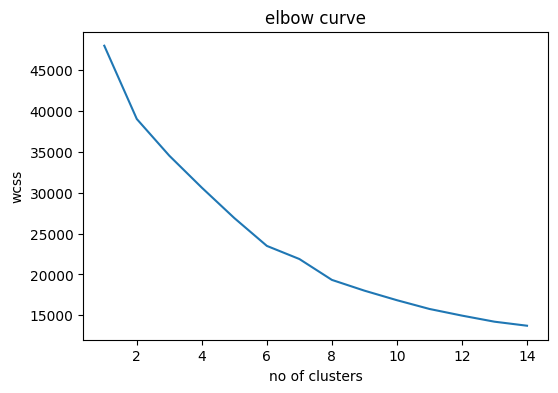

In [ ]:
plt.figure(figsize=(6,4))
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('elbow curve')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
x=df_norm.iloc[:,:].values
km=KMeans(n_clusters=3)
y_means=km.fit_predict(x)

In [ ]:
y_means

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
#rows with cluster numbert 0
x[y_means==0]

array([[-1.73167859,  0.23967783, -0.18629869, ...,  0.69249029,
         1.36397545,  1.30391816],
       [-1.72995538,  0.11227003, -0.18629869, ..., -0.36216787,
         1.39254859, -0.7669193 ],
       [-1.72737055,  0.31021955, -0.18629869, ...,  0.42882575,
         1.36203829,  1.30391816],
       ...,
       [ 1.70097179,  0.17867333, -0.18629869, ..., -0.36216787,
        -1.29526372, -0.7669193 ],
       [ 1.70786466, -0.15099112, -0.18629869, ..., -0.36216787,
        -1.29962234, -0.7669193 ],
       [ 1.71734236, -0.14473883, -0.18629869, ..., -0.36216787,
        -1.30785528, -0.7669193 ]])

In [ ]:
#rows with cluster numbert 1
x[y_means==1]

array([[-1.72823216,  3.66604247, -0.18629869, ...,  2.8018066 ,
         1.37027123,  1.30391816],
       [-1.71703124,  1.11230909,  2.43015189, ...,  2.01081298,
         1.34508812,  1.30391816],
       [-1.71616963, -0.52615835, -0.18629869, ...,  2.53814206,
         1.33927664, -0.7669193 ],
       ...,
       [ 1.65875295,  0.56713909, -0.18629869, ...,  1.4834839 ,
        -1.24635038, -0.7669193 ],
       [ 1.6734003 ,  0.02971002, -0.18629869, ..., -0.09850333,
        -1.2608791 , -0.7669193 ],
       [ 1.68718604, -0.13845676, -0.18629869, ...,  3.06547114,
        -1.27976643, -0.7669193 ]])

In [ ]:
#rows with cluster numbert 2
x[y_means==2]

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

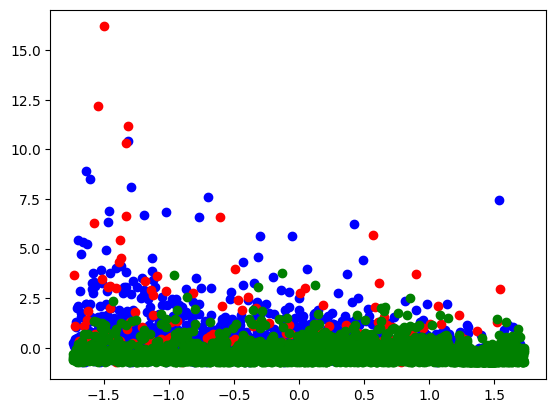

In [ ]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='blue')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='red')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='green')

# **Hierarchical clustering**

In [ ]:
X=df_norm.values

In [ ]:
model = AgglomerativeClustering(n_clusters=3)

In [ ]:
h_clusters=model.fit(X)
h_clusters

AgglomerativeClustering(n_clusters=3)

In [ ]:
labels=model.labels_

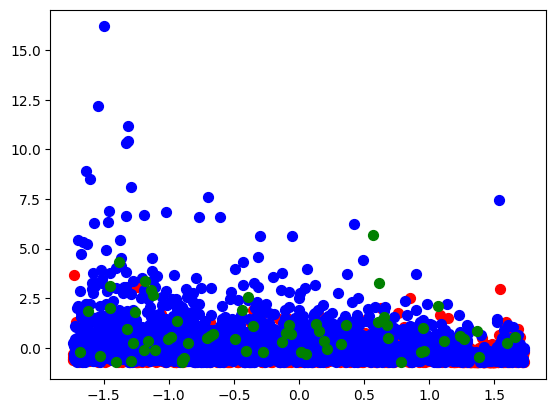

In [ ]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

# **performing linkage**

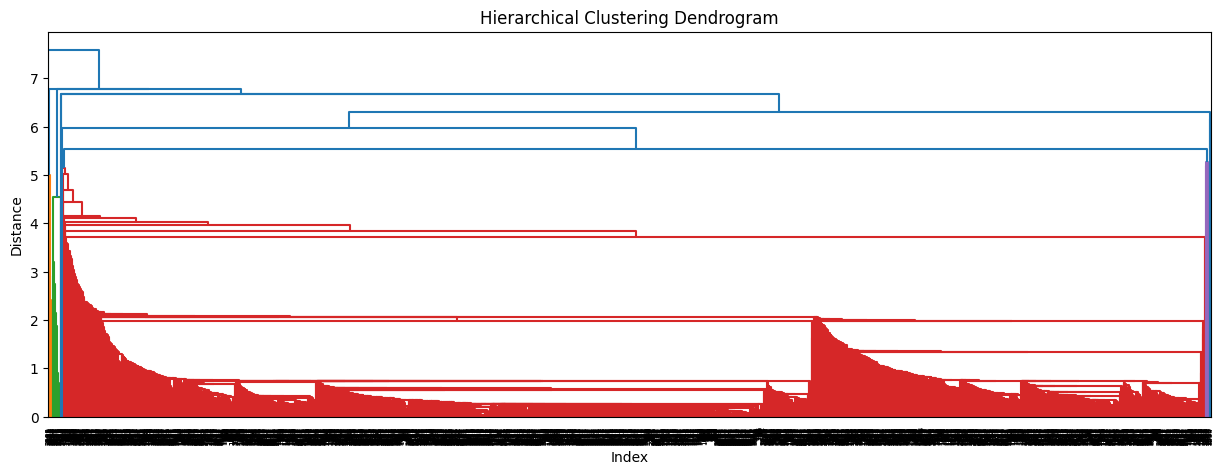

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(X, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
X.shape

(3999, 12)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(X)



In [ ]:
h_complete

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=5)

In [ ]:
h_complete.labels_

array([0, 0, 0, ..., 0, 0, 0])

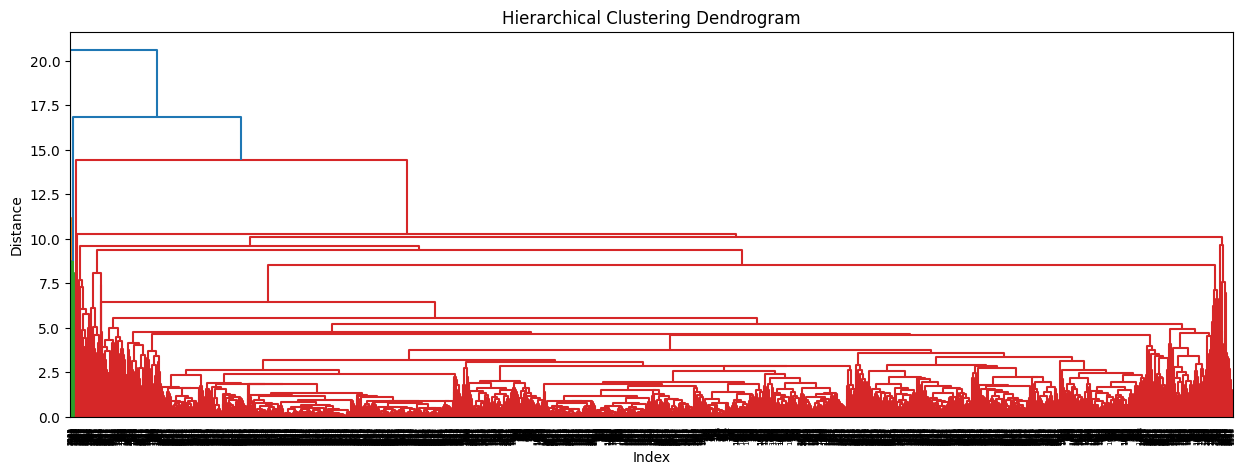

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(X, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(X)
labels=h_complete.labels_

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4])

# **DB scan**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=3,min_samples=3)


In [ ]:
labels=dbscan.fit_predict(df_norm)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
labels.shape

(3999,)

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [ ]:
x[labels==-1]

array([[-1.72823216e+00,  3.66604247e+00, -1.86298687e-01,
         6.83121167e-01,  6.67536684e+00, -6.27665798e-02,
        -6.37397687e-01,  3.26974658e+00,  2.42132978e+00,
         2.80180660e+00,  1.37027123e+00,  1.30391816e+00],
       [-1.64207126e+00,  2.28513023e-01,  1.34168777e+00,
        -7.69578406e-01, -9.82418871e-02,  1.01822764e+01,
         1.32160935e+00,  1.49939447e+00,  1.31421388e+00,
         2.01081298e+00,  1.26857022e+00,  1.30391816e+00],
       [-1.62483907e+00,  5.24460701e+00, -1.86298687e-01,
         2.13582074e+00, -9.82418871e-02, -6.27665798e-02,
         7.35499984e+00,  1.49939447e+00,  1.27850047e+00,
         2.27447752e+00,  1.71121175e+00,  1.30391816e+00],
       [-1.61708459e+00,  1.84475010e+00,  2.10955914e+00,
        -7.69578406e-01, -9.82418871e-02, -6.27665798e-02,
         8.39472483e-02,  1.49939447e+00,  4.79412914e+00,
         5.70211652e+00,  1.26130587e+00,  1.30391816e+00],
       [-1.60329885e+00,  8.50320185e+00, -1.8629868

In [ ]:
x[labels==0]

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
x[labels==1]

array([[-1.56194162, -0.64440604, -0.18629869, -0.76957841, 13.44897558,
        -0.06276658, -0.23802628,  0.45801087, -0.32860326, -0.36216787,
         1.63081952,  1.30391816],
       [-1.40340555,  0.93356304, -0.18629869, -0.76957841, 13.44897558,
        -0.06276658, -0.05126093,  0.14559579, -0.32860326, -0.36216787,
         1.39254859, -0.7669193 ],
       [-0.91659645, -0.28559401, -0.18629869, -0.76957841, 13.44897558,
        -0.06276658,  0.16407828,  0.77042595,  1.09993338,  0.69249029,
         0.87048343,  1.30391816],
       [-0.63054225, -0.57062901, -0.18629869, -0.76957841, 13.44897558,
        -0.06276658, -0.26196206,  0.14559579, -0.32860326, -0.36216787,
         0.63366537, -0.7669193 ],
       [-0.17819751, -0.40780149, -0.18629869, -0.76957841, 13.44897558,
        -0.06276658, -0.10671077,  0.14559579, -0.32860326, -0.36216787,
         0.10772588, -0.7669193 ],
       [-0.06877316, -0.21299796, -0.18629869, -0.76957841, 13.44897558,
        -0.06276658, -

In [ ]:
x[labels==2]

array([[-1.53781656,  0.43396529, -0.18629869, -0.76957841,  6.67536684,
        -0.06276658, -0.44297123, -0.06268093, -0.32860326, -0.36216787,
         1.59691919,  1.30391816],
       [-1.39306624, -0.61939688, -0.18629869, -0.76957841,  6.67536684,
        -0.06276658, -0.33546727,  0.87456431, -0.32860326, -0.36216787,
         2.02309483,  1.30391816],
       [-1.04325298, -0.17855082, -0.18629869, -0.76957841,  6.67536684,
        -0.06276658, -0.49900083,  0.14559579, -0.32860326, -0.36216787,
         0.98429169, -0.7669193 ],
       [-0.73565855,  0.11169442, -0.18629869, -0.76957841,  6.67536684,
        -0.06276658, -0.42450175,  0.14559579, -0.32860326, -0.36216787,
         0.69178023, -0.7669193 ],
       [-0.53231882, -0.55027433, -0.18629869, -0.76957841,  6.67536684,
        -0.06276658, -0.38913643,  0.45801087, -0.32860326, -0.36216787,
         0.57700338,  1.30391816],
       [-0.52714917, -0.24271123, -0.18629869, -0.76957841,  6.67536684,
        -0.06276658, -

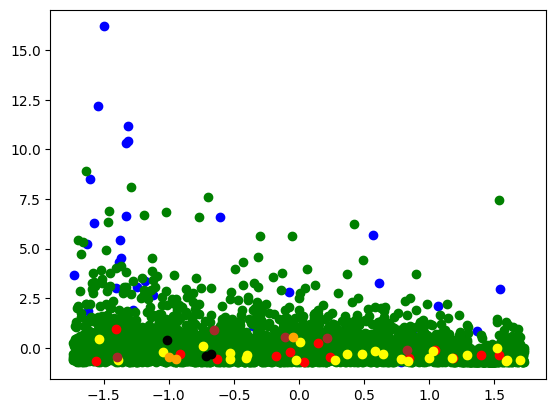

In [ ]:
plt.scatter(x[labels==-1,0],x[labels==-1,1],color='blue')
plt.scatter(x[labels==0,0],x[labels==0,1],color='green')
plt.scatter(x[labels==1,0],x[labels==1,1],color='red')
plt.scatter(x[labels==2,0],x[labels==2,1],color='yellow')
plt.scatter(x[labels==3,0],x[labels==3,1],color='brown')
plt.scatter(x[labels==4,0],x[labels==4,1],color='orange')
plt.scatter(x[labels==5,0],x[labels==5,1],color='black')

# **CONCLUSION**

From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.